# DATA ANALYSIS PROJECT: ONLINE EDUCATION SYSTEM

## Determining the Problems

1. Bagaimana demografi dan latar belakang siswa yang menggunakan sistem pendidikan online?
2. Bagaimana skor performa pembelajaran online siswa dalam berbagai status ekonomi dan lokasi rumah (perkotaan vs pedesaan)?
3. Bagaimana kualitas fasilitas internet berdampak pada performa siswa secara keseluruhan?
4. Bagaimana waktu yang siswa gunakan untuk belajar dan bermain sosial media berdampak pada performa siswa secara keseluruhan?
5. Bagaimana interaksi siswa pada mode online berpengaruh pada performa siswa secara keseluruhan?

## Importing Libraries

In [45]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
warnings.filterwarnings('ignore')

## Data Wrangling

### Loading the Data

In [46]:
df = pd.read_csv('Dataset/ONLINE EDUCATION SYSTEM REVIEW.csv')

In [47]:
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


### Assessing the Data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

Tipe data pada "Average marks scored before pandemic in traditional classroom" belum sesuai dengan tipe data yang seharusnya. Seharusnya tipe data tersebut adalah float, bukan object.

In [49]:
df.nunique()

Gender                                                            2
Home Location                                                     2
Level of Education                                                3
Age(Years)                                                       24
Number of Subjects                                               20
Device type used to attend classes                                3
Economic status                                                   3
Family size                                                       9
Internet facility in your locality                                5
Are you involved in any sports?                                   2
Do elderly people monitor you?                                    2
Study time (Hours)                                               10
Sleep time (Hours)                                               10
Time spent on social media (Hours)                               10
Interested in Gaming?                           

In [50]:
# Mengecek nilai null pada dataset
df.isna().sum()

Gender                                                           0
Home Location                                                    0
Level of Education                                               0
Age(Years)                                                       0
Number of Subjects                                               0
Device type used to attend classes                               0
Economic status                                                  0
Family size                                                      0
Internet facility in your locality                               0
Are you involved in any sports?                                  0
Do elderly people monitor you?                                   0
Study time (Hours)                                               0
Sleep time (Hours)                                               0
Time spent on social media (Hours)                               0
Interested in Gaming?                                         

In [51]:
print("Sum of duplicated rows: ", df.duplicated().sum())

Sum of duplicated rows:  0


In [52]:
df.describe()

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
count,1033.000000,1033.00000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,19.798645,7.03485,4.413359,3.586641,4.325266,6.947725,2.636980,2.930300,2.833495,6.696031
std,3.199158,2.81034,1.236750,1.026063,2.134233,1.324039,1.859625,1.105387,1.163629,1.920048
min,9.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,18.000000,6.00000,4.000000,3.000000,3.000000,6.000000,1.000000,2.000000,2.000000,6.000000
50%,19.000000,7.00000,4.000000,4.000000,4.000000,7.000000,2.000000,3.000000,3.000000,7.000000
75%,20.000000,8.00000,5.000000,4.000000,6.000000,8.000000,3.000000,4.000000,4.000000,8.000000
max,40.000000,20.00000,10.000000,5.000000,10.000000,10.000000,10.000000,5.000000,5.000000,10.000000


### Cleaning the Data

In [53]:
# Melihat entri "Average marks scored before pandemic in traditional classroom"
df['Average marks scored before pandemic in traditional classroom'].head()

0    91-100
1    91-100
2     71-80
3    91-100
4     81-90
Name: Average marks scored before pandemic in traditional classroom, dtype: object

- Data masih berupa object.
- Terdapat nilai '-' yang tidak sesuai. Perlu juga mengganti data dengan mencari rerata antara 2 angka tersebut.

In [54]:
def calculate_mean(value):
    # Split the string into two parts on the '-' character
    values = value.split('-')
    # Convert the parts to integers and calculate the mean
    mean_value = (int(values[0]) + int(values[1])) / 2
    return mean_value

In [55]:
# Mengaplikasikan fungsi untuk kolom tersebut
df['Average marks scored before pandemic in traditional classroom_mean'] = df['Average marks scored before pandemic in traditional classroom'].apply(calculate_mean)

In [56]:
# Melihat hasil perubahan
df['Average marks scored before pandemic in traditional classroom_mean'].head()

0    95.5
1    95.5
2    75.5
3    95.5
4    85.5
Name: Average marks scored before pandemic in traditional classroom_mean, dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 24 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Gender                                                              1033 non-null   object 
 1   Home Location                                                       1033 non-null   object 
 2   Level of Education                                                  1033 non-null   object 
 3   Age(Years)                                                          1033 non-null   int64  
 4   Number of Subjects                                                  1033 non-null   int64  
 5   Device type used to attend classes                                  1033 non-null   object 
 6   Economic status                                                     1033 non-null   object 
 7   Family size    

In [58]:
# Menghapus kolom yang tidak diperlukan
df.drop('Average marks scored before pandemic in traditional classroom', axis=1, inplace=True)

In [59]:
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education,Average marks scored before pandemic in traditional classroom_mean
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,1,1,Practical,6,Average,95.5
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,1,1,Theory,3,Bad,95.5
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,1,1,Both,6,Bad,75.5
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,1,2,Theory,4,Bad,95.5
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,3,3,Both,6,Average,85.5


## Exploratory Data Analysis (EDA)

### 1. Bagaimana demografi dan latar belakang siswa yang menggunakan sistem pendidikan online?

Berdasarkan:
- Gender
- Lokasi rumah
- Level Edukasi
- Usia
- Status Ekonomi


In [60]:
# Mengelompokkan data berdasarkan gender
gender_data = df.groupby('Gender').size().reset_index(name='Jumlah')
gender_data

,Gender,Jumlah
0,Female,419
1,Male,614


In [61]:
# Mengelompokkan data berdasarkan lokasi rumah
location_data = df.groupby('Home Location').size().reset_index().rename(columns={'Home Location': 'Lokasi Rumah', 0: 'Jumlah'})

location_data

,Lokasi Rumah,Jumlah
0,Rural,354
1,Urban,679


In [62]:
# Mengelompokkkan data berdasarkan level edukasi
education_data = df.groupby('Level of Education').size().reset_index().rename(columns={'Level of Education': 'Pendidikan', 0: 'Jumlah'})

education_data

,Pendidikan,Jumlah
0,Post Graduate,129
1,School,87
2,Under Graduate,817


In [63]:
# Membuat Interval Usia
df['Age(Years)_interval'] = pd.cut(df['Age(Years)'], bins=[9, 15, 20, 25, 30, 35, 40], labels=['9-15', '16-20', '21-25', '26-30', '31-35', '36-40'])

In [64]:
# Mengelompokkan data berdasarkan usia
age_data = df.groupby('Age(Years)_interval').size().reset_index().rename(columns={'Age(Years)': 'Usia', 0: 'Jumlah'})

age_data

,Age(Years)_interval,Jumlah
0,9-15,2
1,16-20,794
2,21-25,206
3,26-30,7
4,31-35,5
5,36-40,17


In [65]:
# Mengelompokkan data berdasarkan status ekonomi
economic_data = df.groupby('Economic status').size().reset_index().rename(columns={'Economic status': 'Status Ekonomi', 0: 'Jumlah'})

economic_data

,Status Ekonomi,Jumlah
0,Middle Class,954
1,Poor,49
2,Rich,30


### 2. Bagaimana skor performa pembelajaran online siswa dalam berbagai status ekonomi dan lokasi rumah (perkotaan vs pedesaan)?

In [66]:
# Mengelompokkan data berdasarkan status ekonomi dan lokasi rumah
df['Economic status'] = pd.Categorical(df['Economic status'], categories=['Poor', 'Middle Class', 'Rich'], ordered=True)

performance_data = (df.groupby(['Economic status', 'Home Location'])
                    .agg({'Performance in online': 'mean'})
                    .reset_index().sort_values('Economic status', ascending=True)
                    .rename(columns={
    'Performance in online': 'Rata-rata Performa Online',
    'Economic status': 'Status Ekonomi',
    'Home Location': 'Lokasi Rumah'
}))

performance_data

,Status Ekonomi,Lokasi Rumah,Rata-rata Performa Online
0,Poor,Rural,6.485714
1,Poor,Urban,6.071429
2,Middle Class,Rural,6.721519
3,Middle Class,Urban,6.680251
4,Rich,Rural,9.000000
5,Rich,Urban,7.111111


### 3. Bagaimana kualitas fasilitas internet berdampak pada performa siswa secara keseluruhan?

In [67]:
# Mengelompokkan data berdasarkan kualitas fasilitas internet
internet_facility_data = (df.groupby('Internet facility in your locality')
                          .agg({'Performance in online': 'mean'})
                          .reset_index()
                          .rename(columns={
    
    'Internet facility in your locality': 'Kualitas Fasilitas Internet (skala 1-5)',
    'Performance in online': 'Rata-rata Performa Online'
}))

internet_facility_data

,Kualitas Fasilitas Internet (skala 1-5),Rata-rata Performa Online
0,1,5.562500
1,2,6.155963
2,3,6.279141
3,4,6.895184
4,5,7.450704


### 4. Bagaimana waktu yang siswa gunakan untuk belajar dan bermain sosial media berdampak pada performa siswa secara keseluruhan?

In [69]:
# Mengelompokkan data berdasarkan waktu yang diberikan untuk bermain sosmed
social_media_data = (df.groupby('Time spent on social media (Hours)')
                          .agg({'Performance in online': 'mean'})
                          .reset_index()
                          .rename(columns={
    
    'Time spent on social media (Hours)': 'Waktu Bermain Media Sosial (Jam)',
    'Performance in online': 'Rata-rata Performa Online'
}))

social_media_data

,Waktu Bermain Media Sosial (Jam),Rata-rata Performa Online
0,1,6.717687
1,2,6.755882
2,3,6.773481
3,4,6.760870
4,5,6.775510
5,6,6.269231
6,7,7.000000
7,8,6.187500
8,9,5.500000
9,10,5.105263


### 5. Bagaimana interaksi siswa pada mode online berpengaruh pada performa siswa secara keseluruhan?

In [70]:
# Mengelompokkan data berdasarkan waktu yang diberikan untuk belajar
student_interaction_data = (df.groupby('Your interaction in online mode')
                          .agg({'Performance in online': 'mean'})
                          .reset_index()
                          .rename(columns={
    
    'Your interaction in online mode': 'Interaksi Pada Mode Online',
    'Performance in online': 'Rata-rata Performa Online'
}))

student_interaction_data

,Interaksi Pada Mode Online,Rata-rata Performa Online
0,1,4.852713
1,2,6.015873
2,3,6.616628
3,4,7.671958
4,5,9.021505


## Data Visualization

### 1. Bagaimana demografi dan latar belakang siswa yang menggunakan sistem pendidikan online?

*Gender*

In [71]:
# Menghitung jumlah siswa berdasarkan Gender
gender_df = df['Gender'].value_counts()
gender_df.rename(index={'Male' : "Pria", "Female": "Wanita"}, inplace=True)

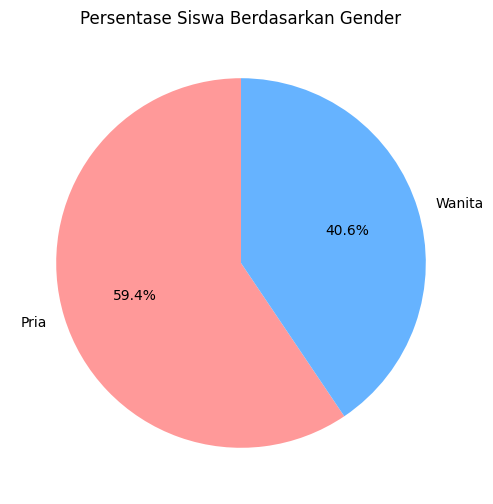

In [72]:
# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(gender_df, labels=gender_df.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Persentase Siswa Berdasarkan Gender")
plt.show()

*Lokasi Rumah*

In [73]:
location_df = df['Home Location'].value_counts()
location_df.rename(index={'Urban': 'Perkotaan', 'Rural': 'Pedesaan'}, inplace=True)

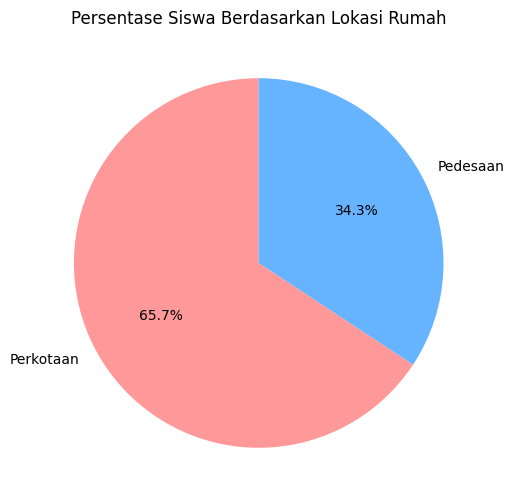

In [74]:
# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(location_df, labels=location_df.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Persentase Siswa Berdasarkan Lokasi Rumah")
plt.show()

*Tingkat Edukasi*

In [75]:
education_df = df['Level of Education'].value_counts()

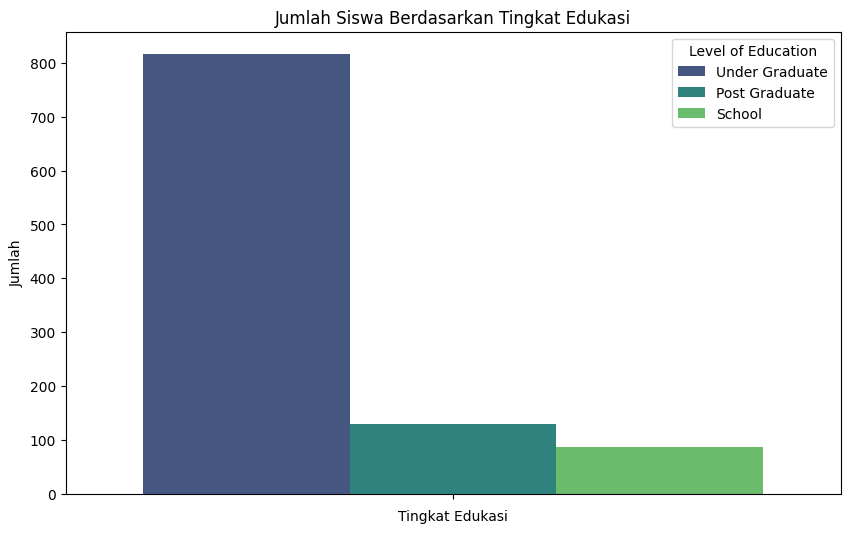

In [76]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(hue=education_df.index, y=education_df.values, palette='viridis')
plt.title("Jumlah Siswa Berdasarkan Tingkat Edukasi")
plt.xlabel("Tingkat Edukasi")
plt.ylabel("Jumlah")
plt.show()

*Usia*

In [77]:
age_df = df['Age(Years)_interval'].value_counts().sort_index()

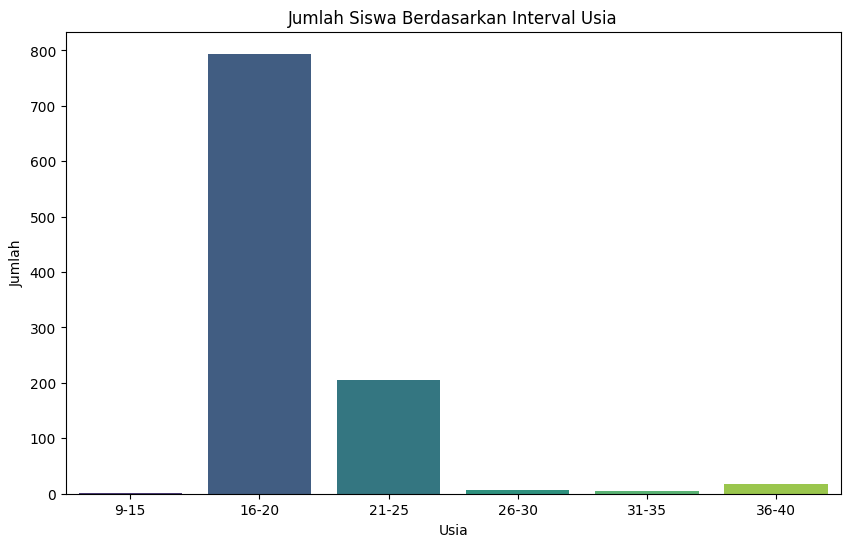

In [78]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=age_df.index, y=age_df.values, palette='viridis')
plt.title("Jumlah Siswa Berdasarkan Interval Usia")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

*Status Ekonomi*

In [79]:
economic_df = df['Economic status'].value_counts()

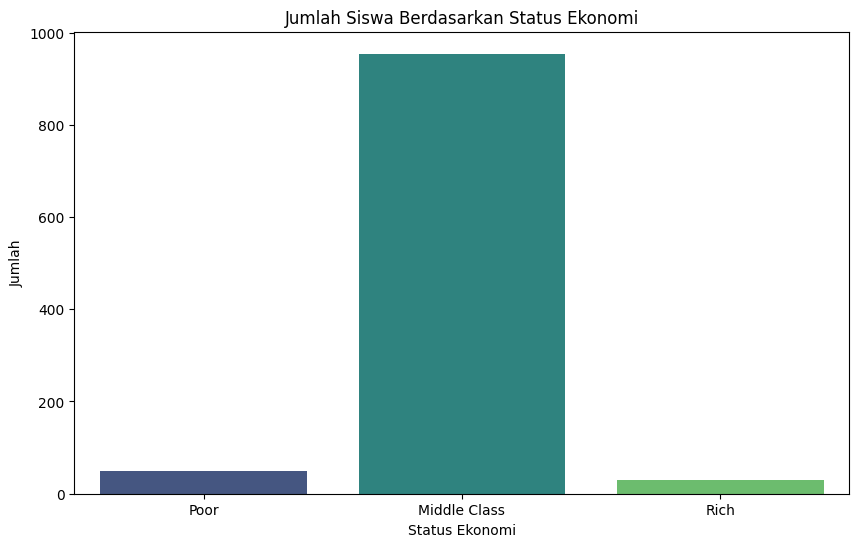

In [80]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=economic_df.index, y=economic_df.values, palette='viridis')
plt.title("Jumlah Siswa Berdasarkan Status Ekonomi")
plt.xlabel("Status Ekonomi")
plt.ylabel("Jumlah")
plt.show()

### 2. Bagaimana skor performa pembelajaran online siswa dalam berbagai status ekonomi dan lokasi rumah (perkotaan vs pedesaan)?

In [81]:
# Ubah data menjadi format pivot
pivot_data = performance_data.pivot_table(index='Status Ekonomi', columns='Lokasi Rumah', values='Rata-rata Performa Online')

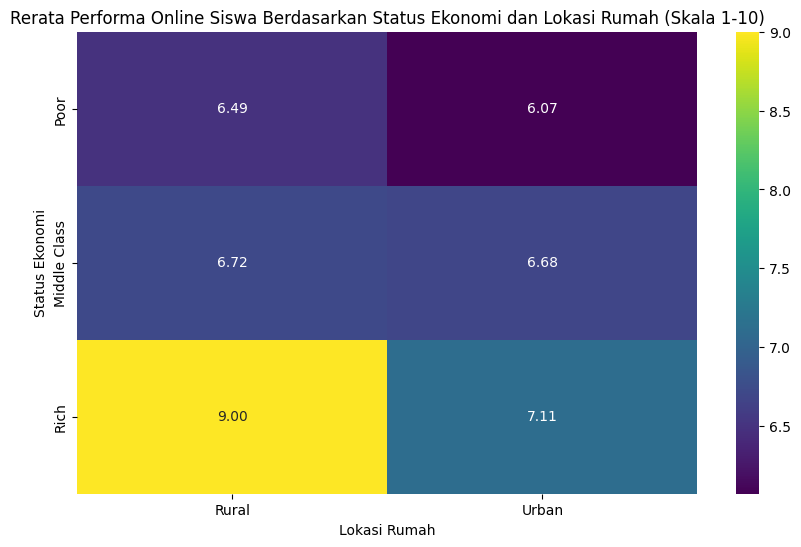

In [82]:
# Visualisasi
class_order = ['Poor', 'Middle Class', 'Rich']

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='viridis', fmt='.2f')
plt.title("Rerata Performa Online Siswa Berdasarkan Status Ekonomi dan Lokasi Rumah (Skala 1-10)")
plt.show()

### 3. Bagaimana kualitas fasilitas internet berdampak pada performa siswa secara keseluruhan?

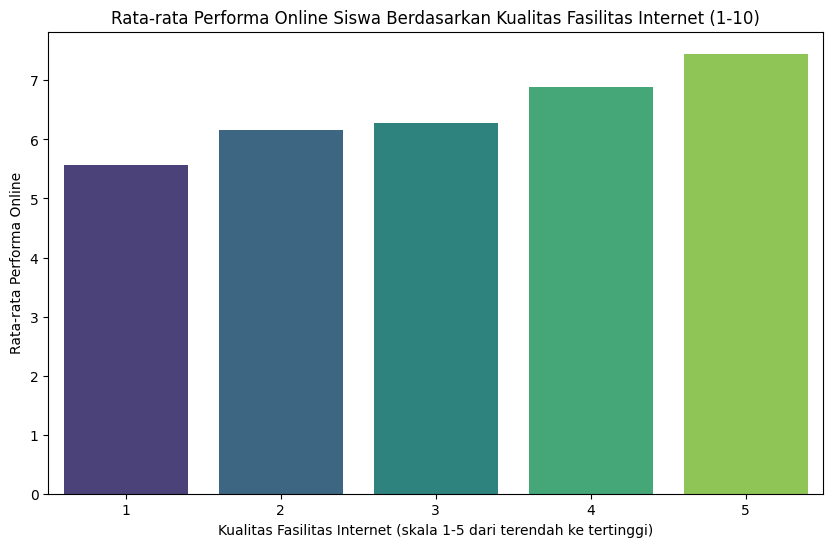

In [83]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Kualitas Fasilitas Internet (skala 1-5)', y='Rata-rata Performa Online', data=internet_facility_data, palette='viridis')
plt.title("Rata-rata Performa Online Siswa Berdasarkan Kualitas Fasilitas Internet (1-10)")
plt.xlabel("Kualitas Fasilitas Internet (skala 1-5 dari terendah ke tertinggi)")
plt.ylabel("Rata-rata Performa Online")
plt.show()

### 4. Bagaimana waktu yang siswa gunakan untuk belajar dan bermain sosial media berdampak pada performa siswa secara keseluruhan?

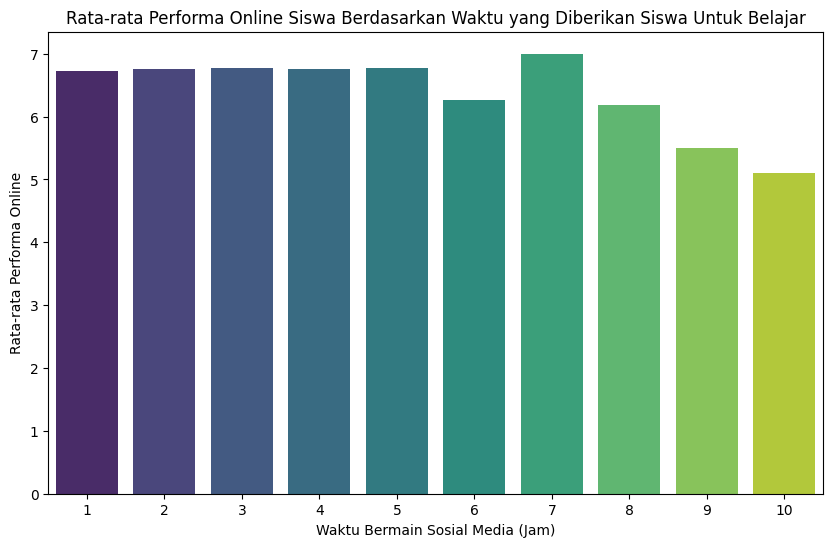

In [86]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Waktu Bermain Media Sosial (Jam)', y='Rata-rata Performa Online', data=social_media_data, palette='viridis')
plt.title("Rata-rata Performa Online Siswa Berdasarkan Waktu yang Diberikan Siswa Untuk Belajar")
plt.xlabel("Waktu Bermain Sosial Media (Jam)")
plt.ylabel("Rata-rata Performa Online")
plt.show()

### 5. Bagaimana interaksi siswa pada mode online berpengaruh pada performa siswa secara keseluruhan?

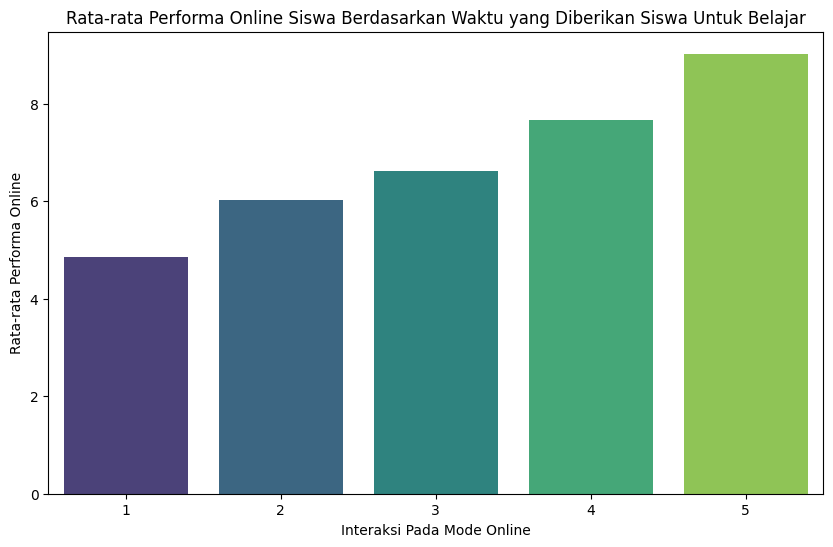

In [87]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Interaksi Pada Mode Online', y='Rata-rata Performa Online', data=student_interaction_data, palette='viridis')
plt.title("Rata-rata Performa Online Siswa Berdasarkan Waktu yang Diberikan Siswa Untuk Belajar")
plt.xlabel("Interaksi Pada Mode Online")
plt.ylabel("Rata-rata Performa Online")
plt.show()

## Conclusion

1. Berdasarkan analisis demografi dan latar belakang siswa yang menggunakan sistem pendidikan online, didapatkan:
    - Persentase siswa berdasarkan gender: Pria (59.4%), Wanita (40.6%).
    - Persentase siswa berdasarkan lokasi rumah: Perkotaan (65.7%), Pedesaan (34.3%).
    - Jumlah siswa berdasarkan tingkat edukasi: School (87), Under Graduate (817), dan Post Graduate (129).
    - Jumlah siswa berdasarkan interval usia: 9-15 (2), 16-20 (794), 21-25 (206), 26-30 (7), 31-35 (5), dan 36-40 (17).
    - Jumlah siswa berdasarkan status ekonomi: Poor (49), Middle Class (954), dan Rich (30).
    
2. Berdasarkan analisis skor performa pembelajaran online siswa dalam berbagai status ekonomi dan lokasi rumah, didapatkan:
    - Kurang Mampu & Perkotaan (6.07), Kurang Mampu & Pedesaan (6.49)
    - Menengah & Perkotaan (6.68), Menengah & Pedesaan (6.72)
    - Kaya & Perkotaan (7.11), Kaya & Pedesaan (9.00)

3. Berdasarkan analisis kualitas fasilitas internet berdampak pada performa siswa secara keseluruhan, didapatkan bahwa semakin tinggi kualitas fasilitas internet, semakin tinggi pula rata-rata performa online siswa.

4. Berdasarkan analisis waktu yang digunakan siswa untuk bermain media sosial berdampak pada performa siswa secara keseluruhan, didapatkan bahwa semakin sedikit waktu yang digunakan siswa untuk bermain sosial media, performa yang didapatkan semain tinggi.

5. Berdasarkan analisis interaksi siswa pada mode online berdampak pada performa siswa secara keseluruhan, didapatkan bahwa semakin tinggi nilai interaksi siswa pada mode online, semakin tinggi pula performa online siswa.